<a href="https://colab.research.google.com/github/KunalSingh4804/Predicting-Temperature-Using-ModelStacking/blob/main/PredictingTemperatureUsingModelStacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [53]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.6 MB/s eta 0:00:00


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt

In [37]:
WH=pd.read_csv(r"/content/weatherHistory.csv")

In [38]:
WH.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [39]:
WH.columns=WH.columns.str.replace(" ","_")

In [40]:
WH.head()

,Formatted_Date,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars),Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [41]:
WH.describe()

,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [42]:
WH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted_Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip_Type               95936 non-null  object 
 3   Temperature_(C)           96453 non-null  float64
 4   Apparent_Temperature_(C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind_Speed_(km/h)         96453 non-null  float64
 7   Wind_Bearing_(degrees)    96453 non-null  float64
 8   Visibility_(km)           96453 non-null  float64
 9   Loud_Cover                96453 non-null  float64
 10  Pressure_(millibars)      96453 non-null  float64
 11  Daily_Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [43]:
WH['Formatted_Date'] = pd.to_datetime(WH['Formatted_Date'], utc=True)
WH1 = WH.copy()
WH1['Year'] = WH1['Formatted_Date'].dt.year
WH1['Month'] = WH1['Formatted_Date'].dt.month
WH1['Day'] = WH1['Formatted_Date'].dt.day
WH1['Hour'] = WH1['Formatted_Date'].dt.hour
WH1['Minute'] = WH1['Formatted_Date'].dt.minute
WH1['Second'] = WH1['Formatted_Date'].dt.second
WH1.drop(columns=['Formatted_Date'], inplace=True)
column_order = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'] + [col for col in WH1.columns if col not in ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']]
WH1 = WH1[column_order]
print(WH1)

       Year  Month  Day  Hour  Minute  Second        Summary Precip_Type  \
0      2006      3   31    22       0       0  Partly Cloudy        rain   
1      2006      3   31    23       0       0  Partly Cloudy        rain   
2      2006      4    1     0       0       0  Mostly Cloudy        rain   
3      2006      4    1     1       0       0  Partly Cloudy        rain   
4      2006      4    1     2       0       0  Mostly Cloudy        rain   
...     ...    ...  ...   ...     ...     ...            ...         ...   
96448  2016      9    9    17       0       0  Partly Cloudy        rain   
96449  2016      9    9    18       0       0  Partly Cloudy        rain   
96450  2016      9    9    19       0       0  Partly Cloudy        rain   
96451  2016      9    9    20       0       0  Partly Cloudy        rain   
96452  2016      9    9    21       0       0  Partly Cloudy        rain   

       Temperature_(C)  Apparent_Temperature_(C)  Humidity  Wind_Speed_(km/h)  \
0     

In [44]:
WH1

,Year,Month,Day,Hour,Minute,Second,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars),Daily_Summary
0,2006,3,31,22,0,0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006,3,31,23,0,0,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006,4,1,0,0,0,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006,4,1,1,0,0,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006,4,1,2,0,0,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016,9,9,17,0,0,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016,9,9,18,0,0,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016,9,9,19,0,0,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016,9,9,20,0,0,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [45]:
LE = LabelEncoder()
SS = StandardScaler()

categorical_cols = ['Summary', 'Precip_Type', 'Daily_Summary']
numerical_cols = [col for col in WH1.columns if col not in categorical_cols and col not in ["Year", "Month", "Day", "Hour", "Minute", "Second"]]

if len(numerical_cols) > 0:
  WH1[numerical_cols] = SS.fit_transform(WH1[numerical_cols])

for col in categorical_cols:
  categorical_data = WH1[col]
  WH1[col] = LE.fit_transform(categorical_data)

In [46]:
WH1

,Year,Month,Day,Hour,Minute,Second,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars),Daily_Summary
0,2006,3,31,22,0,0,19,0,-0.257599,-0.324035,0.793470,0.478635,0.591256,1.306976,0.0,0.101685,197
1,2006,3,31,23,0,0,19,0,-0.269814,-0.339097,0.639996,0.499594,0.665756,1.306976,0.0,0.105960,197
2,2006,4,1,0,0,0,17,0,-0.267487,-0.138102,0.793470,-0.995473,0.153570,1.099586,0.0,0.108610,197
3,2006,4,1,1,0,0,19,0,-0.381489,-0.459071,0.486521,0.476306,0.758881,1.306976,0.0,0.112628,197
4,2006,4,1,2,0,0,17,0,-0.332631,-0.362469,0.486521,0.033841,0.665756,1.306976,0.0,0.113483,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016,9,9,17,0,0,19,0,1.474532,1.417400,-1.559811,0.026855,-1.457488,1.372265,0.0,0.095102,170
96449,2016,9,9,18,0,0,19,0,1.324468,1.283404,-1.304020,-0.103556,-1.559925,1.241686,0.0,0.101942,170
96450,2016,9,9,19,0,0,19,0,1.058076,1.045534,-0.894753,-0.264241,-1.466800,1.372265,0.0,0.106216,170
96451,2016,9,9,20,0,0,19,0,1.003983,0.997233,-0.690120,-0.040680,-1.559925,1.372265,0.0,0.108696,170


<Axes: >

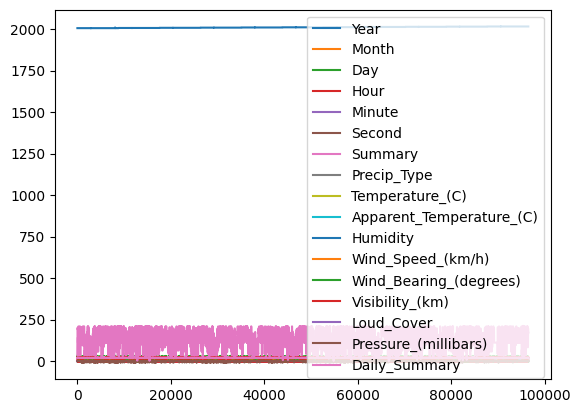

In [47]:
WH1.plot()

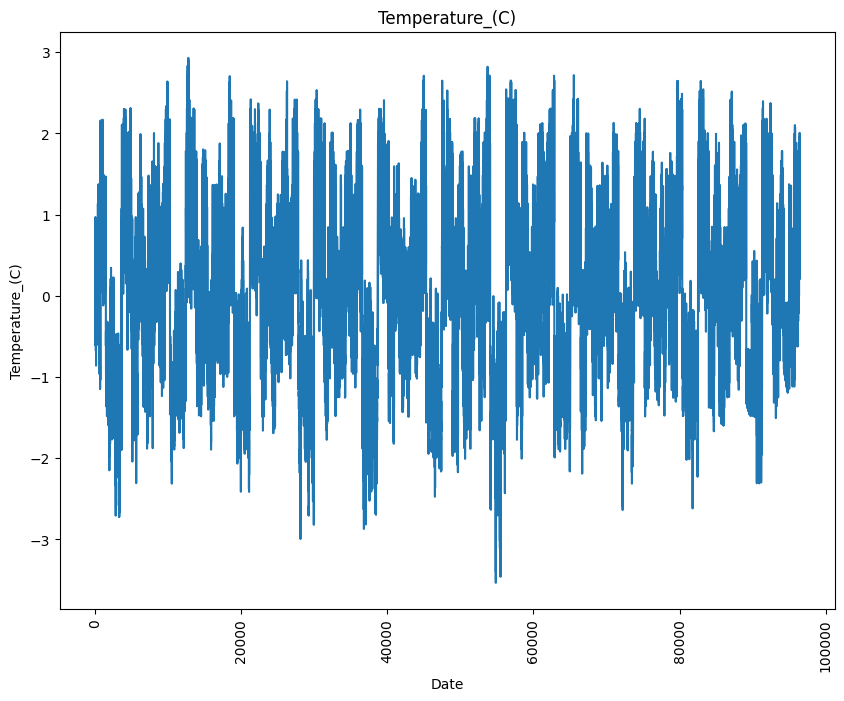

In [48]:
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.plot(WH1.index, WH1['Temperature_(C)'])
plt.title('Temperature_(C)')
plt.ylabel('Temperature_(C)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

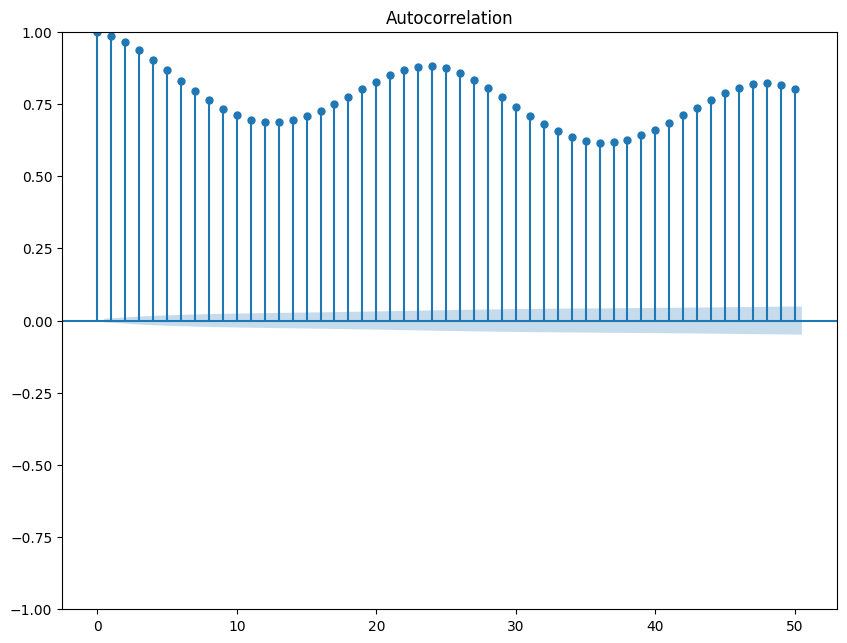

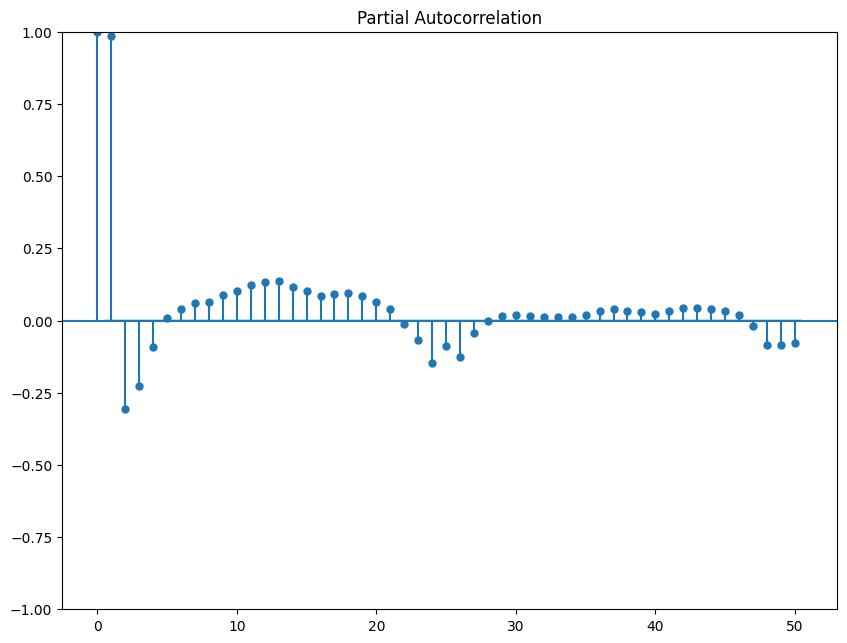

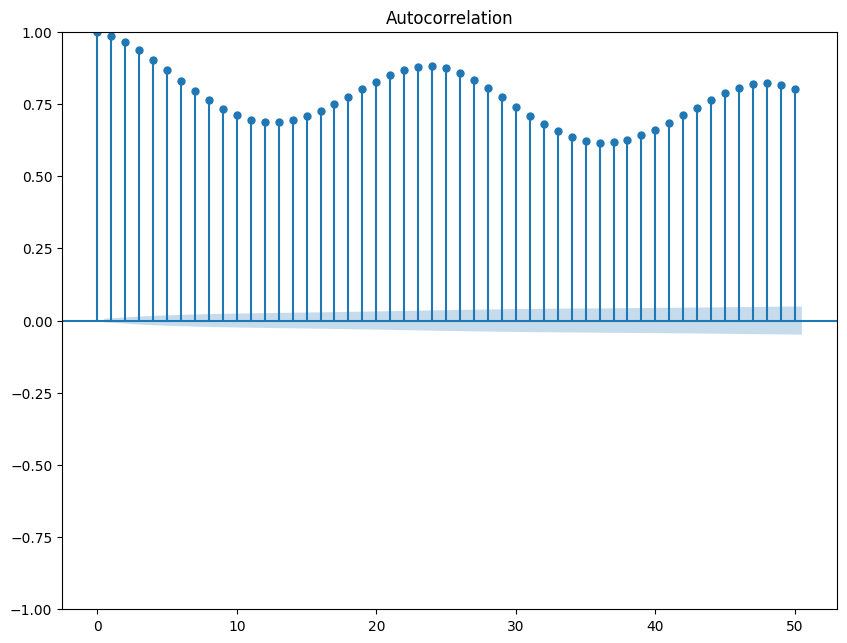

In [49]:
plot_pacf(WH1['Temperature_(C)'])
plot_acf(WH1['Temperature_(C)'])

Column: Apparent_Temperature_(C)


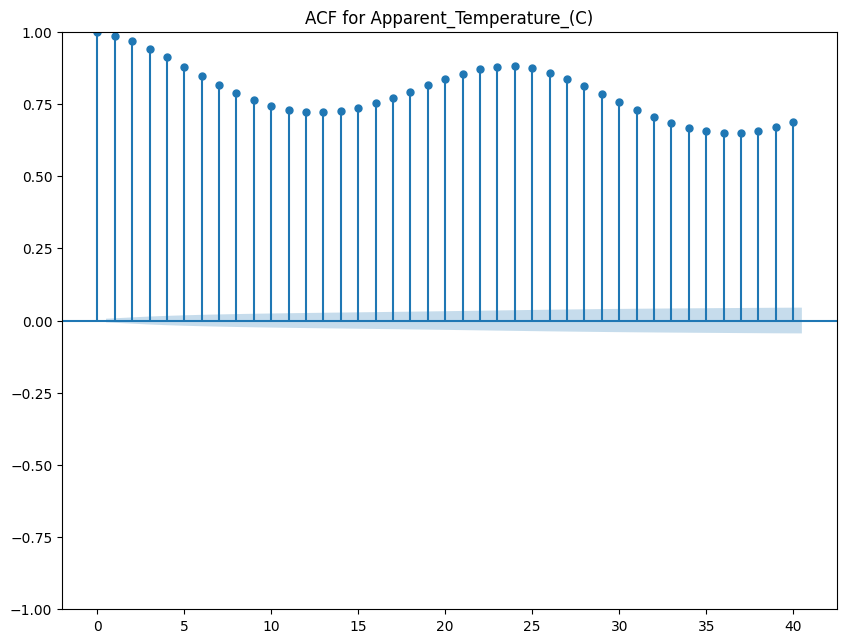

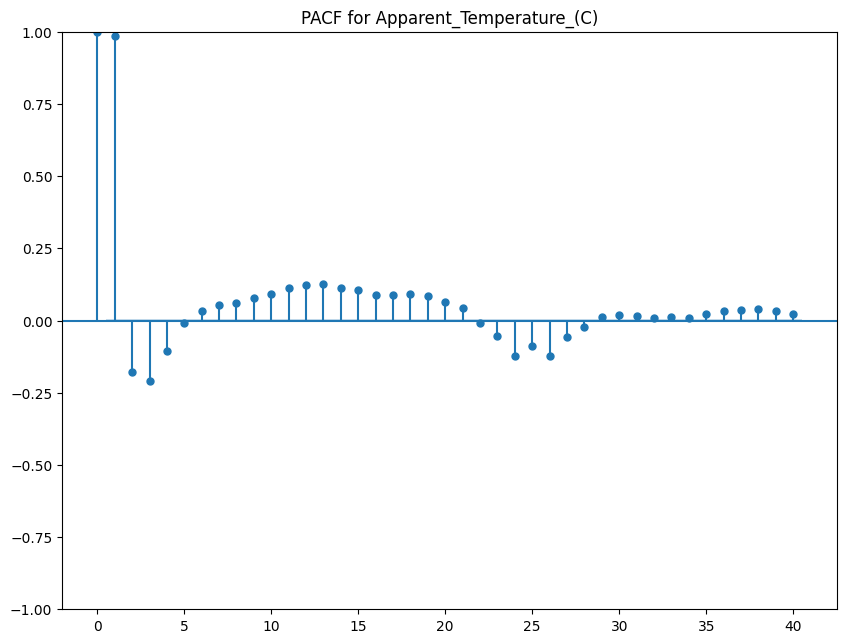



Column: Humidity


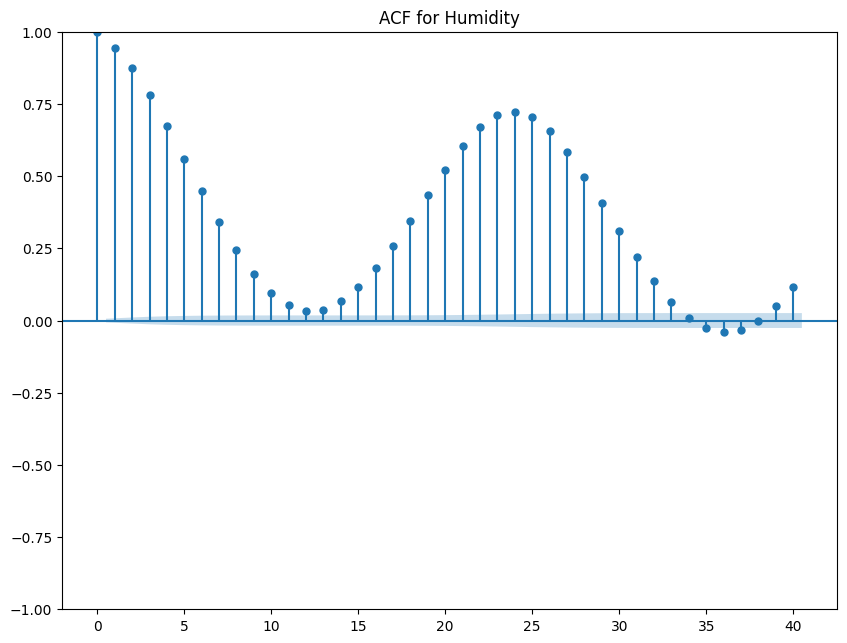

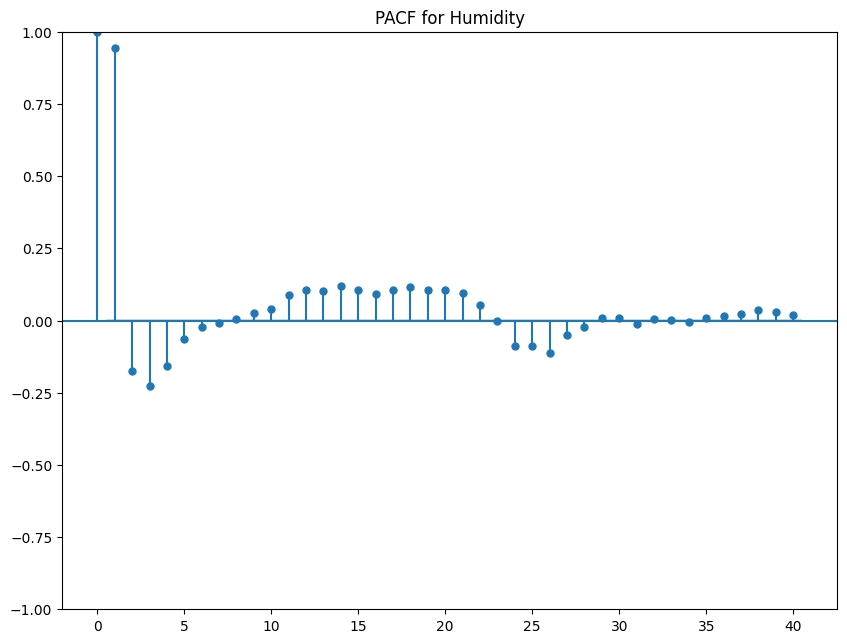



Column: Wind_Speed_(km/h)


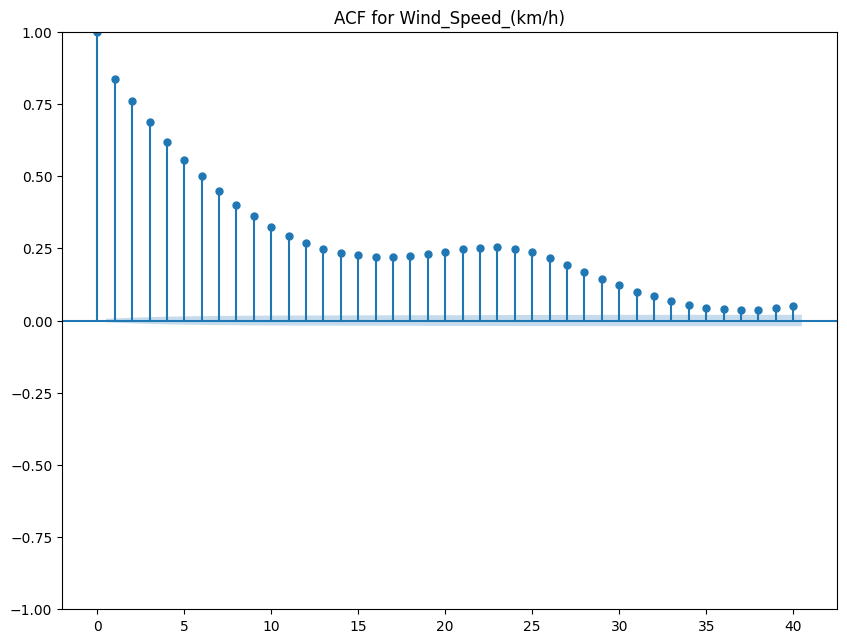

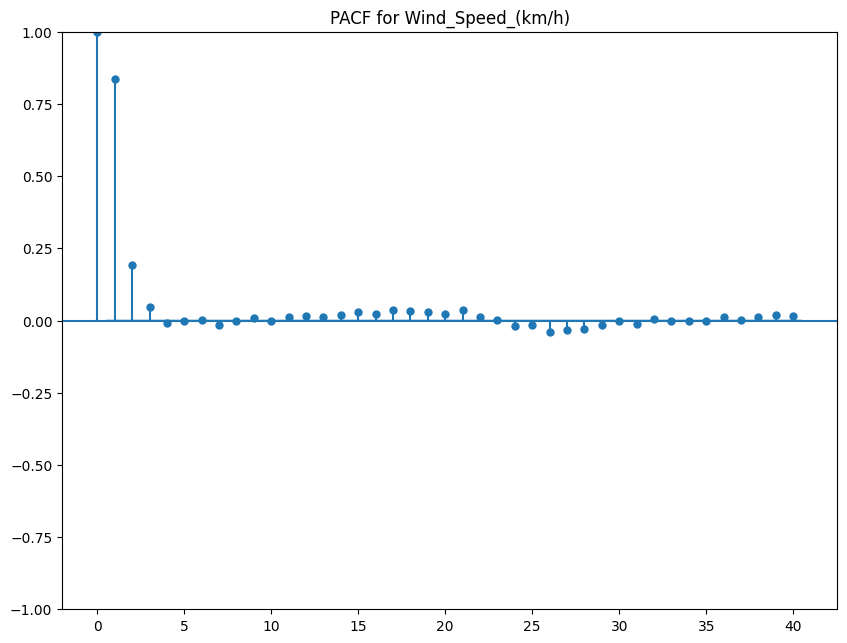



Column: Wind_Bearing_(degrees)


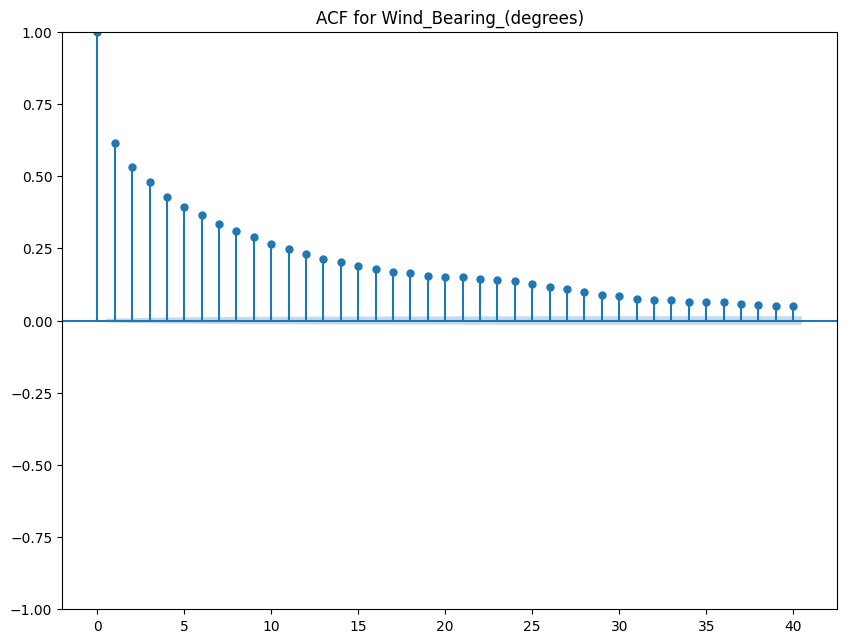

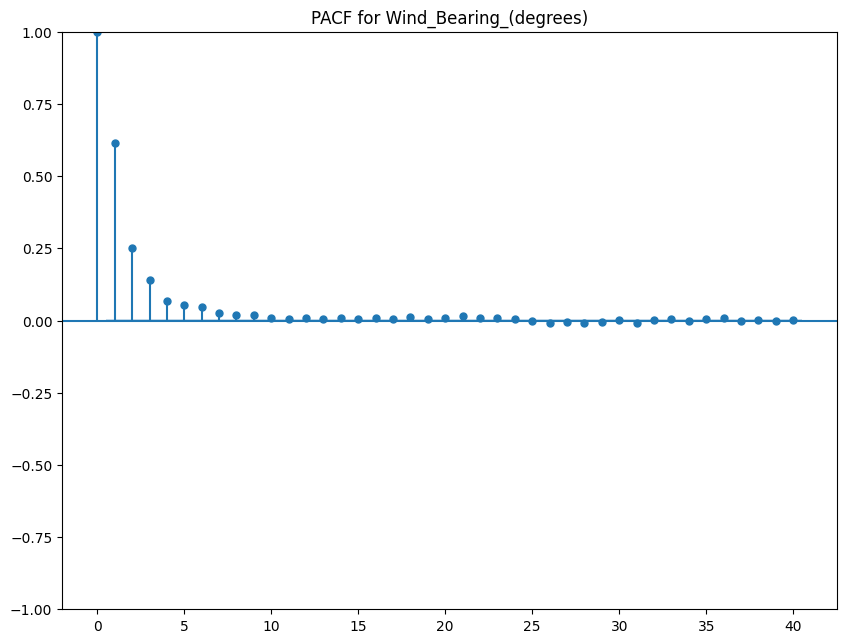



Column: Visibility_(km)


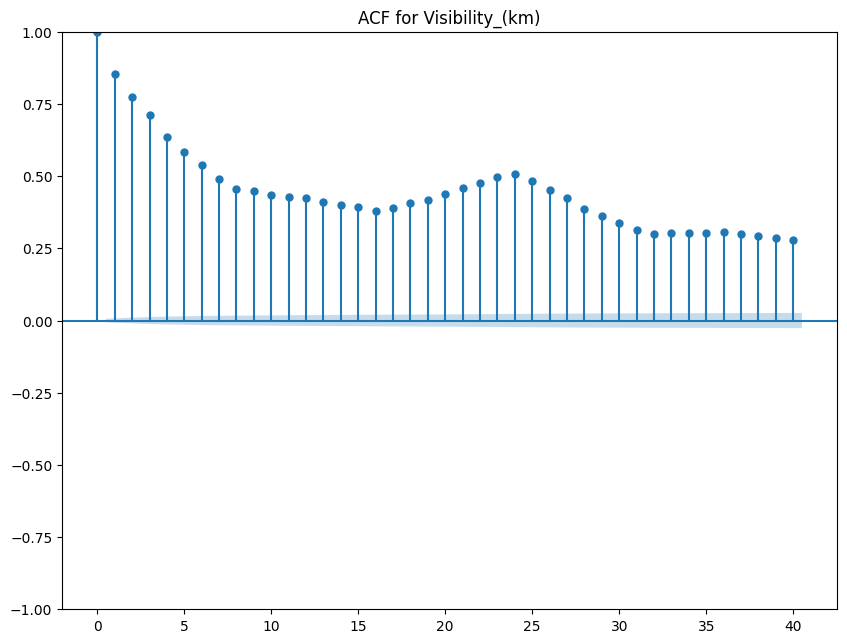

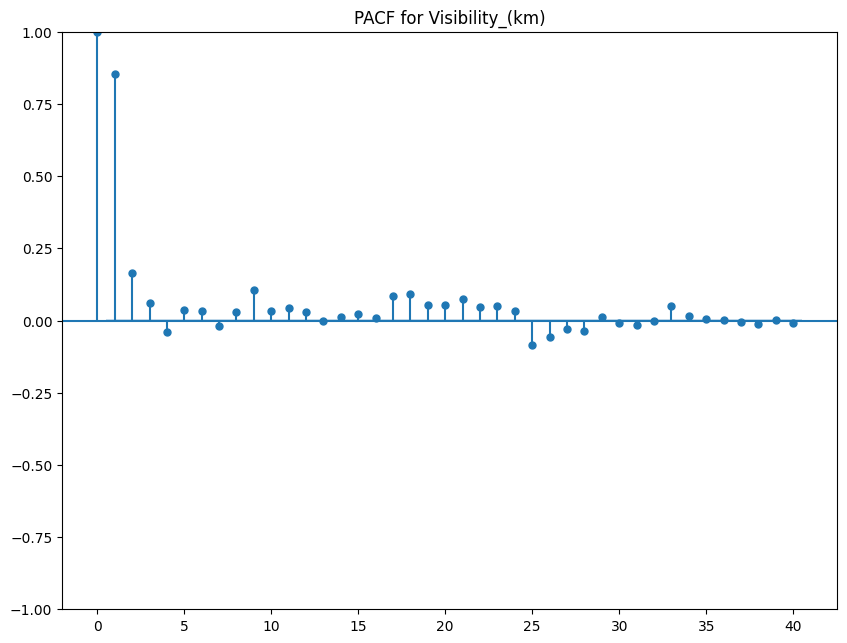



Column: Pressure_(millibars)


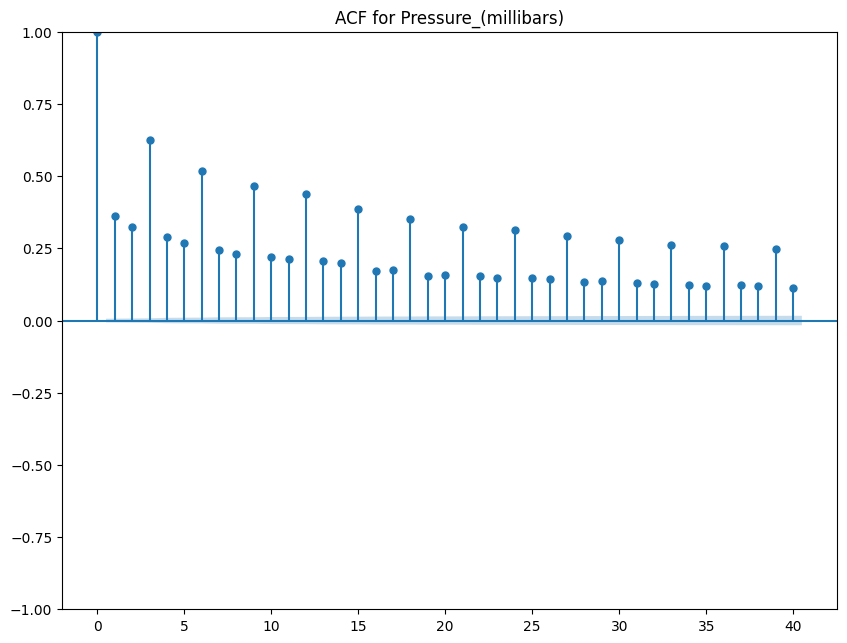

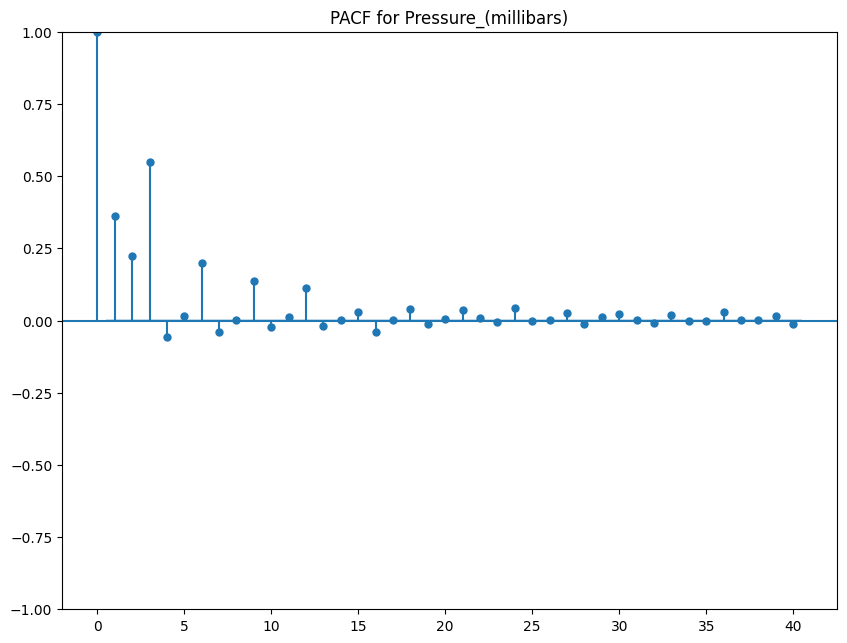

In [50]:
Plots = [ 'Apparent_Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)', 'Wind_Bearing_(degrees)', 'Visibility_(km)', 'Pressure_(millibars)']

for plot in Plots:
    print(f"Column: {plot}")


    plot_acf(WH1[plot].dropna(), lags=40)
    plt.title(f"ACF for {plot}")
    plt.show()


    plot_pacf(WH1[plot].dropna(), lags=40)
    plt.title(f"PACF for {plot}")
    plt.show()

    print("\n")

In [51]:
X = WH1.drop(columns=['Temperature_(C)'])
y = WH1['Temperature_(C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [55]:
xgb_model = XGBRegressor()
catboost_model = CatBoostRegressor()
lgbm_model = LGBMRegressor()
gradientboost_model = GradientBoostingRegressor()

In [56]:
xgb_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)
gradientboost_model.fit(X_train, y_train)

Learning rate set to 0.07873
0:	learn: 0.9283619	total: 60.8ms	remaining: 1m
1:	learn: 0.8602680	total: 71.8ms	remaining: 35.8s
2:	learn: 0.7969685	total: 82.5ms	remaining: 27.4s
3:	learn: 0.7380583	total: 93.6ms	remaining: 23.3s
4:	learn: 0.6843696	total: 104ms	remaining: 20.8s
5:	learn: 0.6360871	total: 115ms	remaining: 19.1s
6:	learn: 0.5901424	total: 126ms	remaining: 17.8s
7:	learn: 0.5471291	total: 136ms	remaining: 16.9s
8:	learn: 0.5074810	total: 147ms	remaining: 16.1s
9:	learn: 0.4718593	total: 157ms	remaining: 15.5s
10:	learn: 0.4385633	total: 167ms	remaining: 15s
11:	learn: 0.4076981	total: 177ms	remaining: 14.6s
12:	learn: 0.3791736	total: 187ms	remaining: 14.2s
13:	learn: 0.3531161	total: 202ms	remaining: 14.2s
14:	learn: 0.3285786	total: 217ms	remaining: 14.2s
15:	learn: 0.3059816	total: 229ms	remaining: 14.1s
16:	learn: 0.2852819	total: 240ms	remaining: 13.8s
17:	learn: 0.2661335	total: 250ms	remaining: 13.6s
18:	learn: 0.2483090	total: 263ms	remaining: 13.6s
19:	learn: 0.

GradientBoostingRegressor()

In [57]:
xgb_preds = xgb_model.predict(X_test)
catboost_preds = catboost_model.predict(X_test)
lgbm_preds = lgbm_model.predict(X_test)
gradientboost_preds = gradientboost_model.predict(X_test)

In [58]:
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_preds))
catboost_rmse = sqrt(mean_squared_error(y_test, catboost_preds))
lgbm_rmse = sqrt(mean_squared_error(y_test, lgbm_preds))
gradientboost_rmse = sqrt(mean_squared_error(y_test, gradientboost_preds))

In [59]:
print("XGBoost RMSE:", xgb_rmse)
print("CatBoost RMSE:", catboost_rmse)
print("LightGBM RMSE:", lgbm_rmse)
print("Gradient Boosting RMSE:", gradientboost_rmse)

XGBoost RMSE: 0.0155387991914177
CatBoost RMSE: 0.014488267295787977
LightGBM RMSE: 0.01634661099796595
Gradient Boosting RMSE: 0.02255970066628063


In [60]:
models = ['XGBoost', 'CatBoost', 'LightGBM', 'Gradient Boosting']
rmse_values = [xgb_rmse, catboost_rmse, lgbm_rmse, gradientboost_rmse]

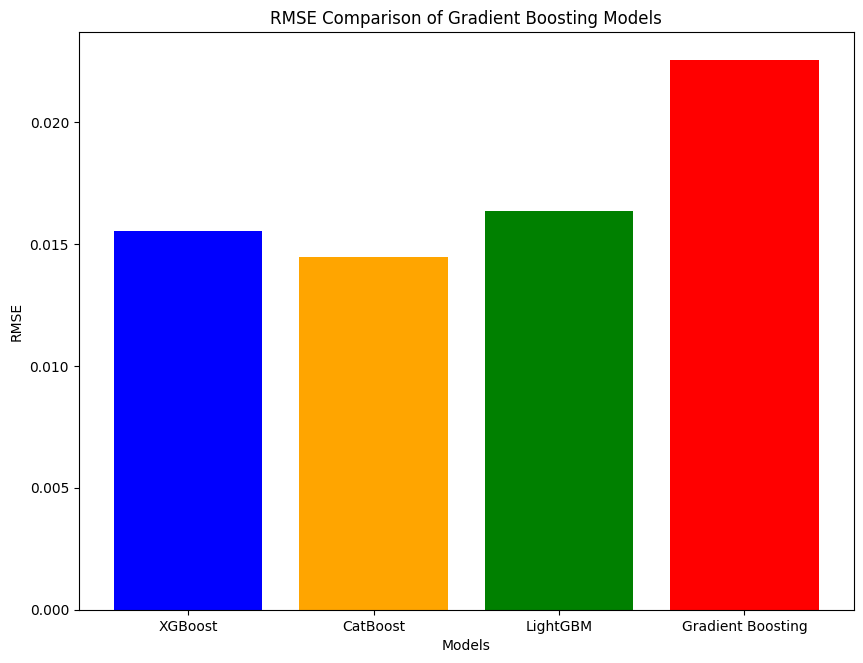

In [61]:
plt.bar(models, rmse_values, color=['blue', 'orange', 'green', 'red'])
plt.title('RMSE Comparison of Gradient Boosting Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

In [62]:
print("Insights and Comparison of Performance:")
print("XGBoost RMSE:", xgb_rmse)
print("CatBoost RMSE:", catboost_rmse)
print("LightGBM RMSE:", lgbm_rmse)
print("Gradient Boosting RMSE:", gradientboost_rmse)

Insights and Comparison of Performance:
XGBoost RMSE: 0.0155387991914177
CatBoost RMSE: 0.014488267295787977
LightGBM RMSE: 0.01634661099796595
Gradient Boosting RMSE: 0.02255970066628063
